# 2023/2024 - Ma412 

# Lab 1: Linear Regression 

The purpose of this notebook is to practice implementing some linear algebra (equations provided) and to explore some properties of linear regression.

In [5]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

We consider a linear regression problem of the form
$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
where $\boldsymbol x\in\mathbb{R}^D$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\theta\in\mathbb{R}^D$ parametrizes the function.

We assume we have a training set $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. We summarize the sets of training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.

In this work, we are interested in finding good parameters $\boldsymbol\theta$.

In [6]:
# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

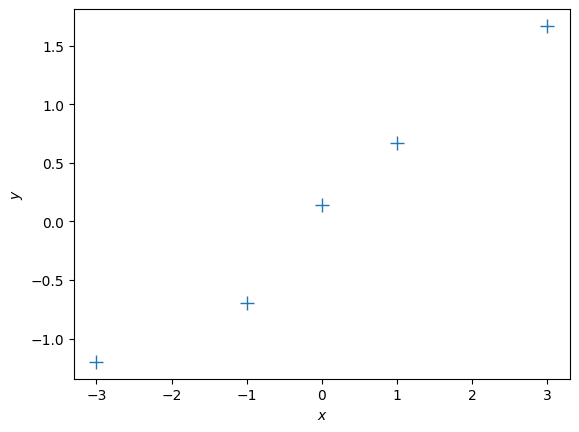

In [7]:
# Plot the training set

plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

## 1. Maximum Likelihood
We will start with maximum likelihood estimation of the parameters $\boldsymbol\theta$. In maximum likelihood estimation, we find the parameters $\boldsymbol\theta^{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$
From the lecture we know that the maximum likelihood estimator is given by
$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
where 
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$

In [8]:
Let us compute the maximum likelihood estimate for a given training set.

SyntaxError: invalid syntax. Perhaps you forgot a comma? (689823932.py, line 1)

In [ ]:
## EDIT THIS CELL
def max_lik_estimate(X, y):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    # ============================================================
   
     return np.linalg.solve(X.T@X,X.T@y)
  
   
    # ============================================================

In [ ]:
##EDIT THIS CELL
# get maximum likelihood estimate

print(max_lik_estimate(X, y))
theta = max_lik_estimate(X, y)
#theta = [[0.8]]
    # ============================================================

[[0.499]]


Now, make a prediction using the maximum likelihood estimate that we just found.

In [ ]:
## EDIT THIS CELL
def predict_with_estimate(Xtest, theta):
    
    # Xtest: K x D matrix of test inputs
    # theta: D x 1 vector of parameters
    # returns: prediction of f(Xtest); K x 1 vector
    
    # ============================================================
    ## x = np.zeros_like(theta)
    ##x = np.zeros((len(  Xtest  ),len(theta )))
    ##x = np.zeros((theta.shape[1] ,len(Xtest)))
    
    ##for n in range (len(theta)) :
      ##  x[ n, :] = Xtest**(n+1)
    ##print (x.shape)
    return Xtest @ theta



    # ============================================================

Now, let's see whether we got something useful:

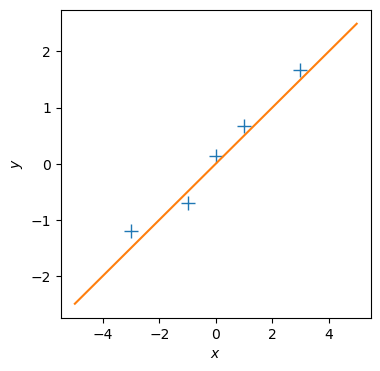

In [ ]:
## EDIT THIS CELL
# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
    # ============================================================
Ytest = predict_with_estimate(Xtest, theta) 

    # ============================================================

# plot the prediction
    # ============================================================
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");
plt.plot(Xtest, Ytest)
plt.show()
    # ============================================================

#### Questions:
1. Does the solution above look reasonable?
2. Play around with different values of $\theta$. How do the corresponding functions change?
3. Modify the training targets $\mathcal Y$ and re-run your computation. What changes?

Let us now look at a different training set, where we add 2.0 to every $y$-value.

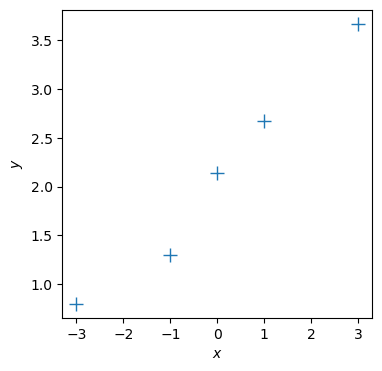

In [ ]:
ynew = y + 2.0

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

Compute the maximum likelihood estimate.

[[0.499]]


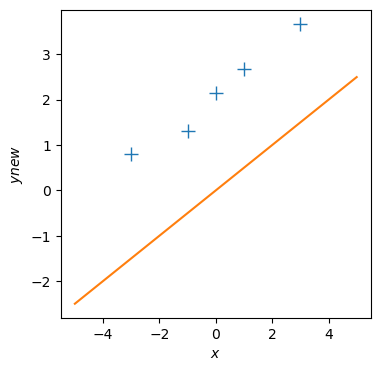

In [ ]:
## EDIT THIS CELL
# get the maximum likelihood estimate
    # ============================================================
print(max_lik_estimate(X, ynew))
theta = max_lik_estimate(X, ynew)
    # ============================================================

# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
    # ============================================================
Ytest = predict_with_estimate(Xtest, theta) 

    # ============================================================

# plot the prediction
    # ============================================================

    # ============================================================

# plot the prediction
    # ============================================================
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$ynew$");
plt.plot(Xtest, Ytest)
plt.show()
    # ============================================================

#### Questions:
1. This maximum likelihood estimate doesn't look too good: The orange line is too far away from the observations although we just shifted them by 2. Why is this the case?
2. How can we fix this problem?

## EDIT THIS CELL
1. The line follow the good trjectory but is under the good estimation 
2. We could add a parameter to the current line to correct the curent problem

Let us now define a linear regression model that is slightly more flexible:
$$
y = \theta_0 + \boldsymbol x^T \boldsymbol\theta_1 + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^2)
$$
Here, we added an offset (bias) parameter $\theta_0$ to our original model.

#### Question:
What is the effect of this bias parameter, i.e., what additional flexibility does it offer?

If we now define the inputs to be the augmented vector $\boldsymbol x_{\text{aug}} = \begin{bmatrix}1\\\boldsymbol x\end{bmatrix}$, we can write the new linear regression model as 
$$
y = \boldsymbol x_{\text{aug}}^T\boldsymbol\theta_{\text{aug}} + \epsilon\,,\quad \boldsymbol\theta_{\text{aug}} = \begin{bmatrix}
\theta_0\\
\boldsymbol\theta_1
\end{bmatrix}\,.
$$

In [9]:
N, D = X.shape
X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
theta_aug = np.zeros((D+1, 1)) # new theta vector of size (D+1) x 1

Let us now compute the maximum likelihood estimator for this setting.
_Hint:_ If possible, re-use code that you have already written

In [10]:
## EDIT THIS FUNCTION
def max_lik_estimate_aug(X_aug, y):
    print  (X_aug.shape)
    # ============================================================
    
    return np.linalg.solve(X_aug.T@X_aug,X_aug.T@y)
   
    # ============================================================

In [11]:
## EDIT THIS CELL
## Output
    # ============================================================
print (max_lik_estimate_aug(X_aug, y))

    # ============================================================

(5, 2)
[[0.116]
 [0.499]]


Now, we can make predictions again.

In [12]:
## EDIT THIS CELL
# define a test set (we also need to augment the test inputs with ones)
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest]) # 100 x (D + 1) vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
    # ============================================================
    # Your code here ...
    # ============================================================

# plot
    # ============================================================
    # Your code here ...
    # ============================================================
    
    
    
    
print(max_lik_estimate(X, ynew))
theta_aug = max_lik_estimate_aug(X_aug, ynew)
    # ============================================================




# predict the function values at the test points using the maximum likelihood estimator
    # ============================================================
Ytest = predict_with_estimate(Xtest_aug, theta_aug) 

    # ============================================================

# plot the prediction
    # ============================================================

    # ============================================================

# plot the prediction
    # ============================================================
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$ynew$")
plt.plot(Xtest_aug, Ytest)
plt.show()

NameError: name 'Xtest' is not defined

It seems this has solved our problem! 
#### Questions:
1. Play around with the first parameter of $\boldsymbol\theta_{\text{aug}}$ and see how the fit of the function changes.
2. Play around with the second parameter of $\boldsymbol\theta_{\text{aug}}$ and see how the fit of the function changes.

## 2. Linear regression

First we will import the packages that we will need throughout the exercise.

In [ ]:
# Tell Jupyter to display plots in this notebook.
%matplotlib inline

# Import the numpy package with the alias np.
import numpy as np           
import pandas as pd

# Import the pyplot package from matplotlib with the alias plt.
import matplotlib.pyplot as plt  
import matplotlib.cm as cm
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (4, 4)

### <font color='black'>Linear regression with one variable</font>

Before starting on any task, it is often useful to understand the data by visualizing them. 

In [ ]:
# Load the data 
data = data = pd.read_csv("./data/articulos_ml.csv")

In [ ]:
# Check the dimensions 
data.shape

(161, 8)

In [ ]:
# Let's visualize the first rows
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Remark that some entries (as for instance in the comments column) are empty.

In our case, the column Shares will correspond to the target value, y.

In [ ]:
# Display some statistics from the dataset 
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In this table, we can read that the the mean number of words is 1808.
There is an article with a minimum of 250 words and a maximum of 8401.

Concerning the outputs, the minimum is 0 times shared and the maximum is shared 350000.

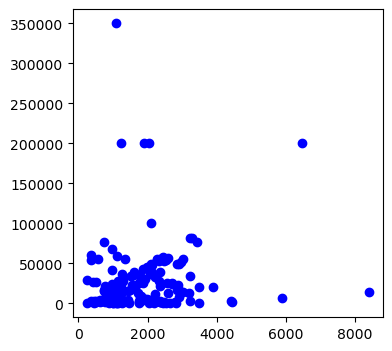

In [ ]:
f1 = data['Word count'].values
f2 = data['# Shares'].values
    
plt.scatter(f1, f2, c='b')
plt.show()

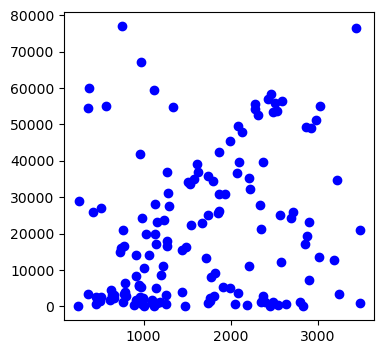

In [ ]:
# We apply a cut to the oringal dataset
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
    
plt.scatter(f1, f2, c='b')
plt.show()

### <font color='black'> Gradient Descent</font>

In this part, you will fit the linear regression parameters  $\theta$  to the dataset using gradient descent.

Recall that the parameters of your model are the  $\theta_𝑗$  values. These are the values you will adjust to minimize cost  $𝐽(\theta)$ .

In the following lines, we add another dimension to our data to account for the  $\theta_0$  intercept term. We also initialize the parameters to $0$ and the learning rate  $\alpha$  to $0.01$.

In [ ]:
# Cost and Gradient descent
# Backup the original X right after you load it
X_original = X.copy()

# Reset X to its original form
X = X_original.copy()

# Add intercept term to X
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Initialize theta AFTER modifying X to ensure consistent dimensions
theta = np.zeros((n+1, 1))


As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. 

Firstly you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent.

Complete the function below that computes $J(\theta)$. 
Once you have completed the function, the next step will run computeCost once using $\theta$ initialized to zeros, and you will see the cost printed to the screen.

In [ ]:
# EDIT THIS CELL
def computeCost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    squared_error = np.square(h - y)
    J = (1 / (2 * m)) * np.sum(squared_error)
    return J



In [ ]:
J = computeCost(X, y, theta)
print('With theta = [0 ; 0] Cost computed = ', J)
print('Expected cost value (approx) 408398897.763')

With theta = [0 ; 0] Cost computed =  0.5187400000000001
Expected cost value (approx) 408398897.763


Next, you will implement gradient descent. The loop structure has already been written. You only need to supply the updates to $\theta$ within each iteration.

A good way to verify that gradient descent is working is to look at the value of $J(\theta)$ and check that it is decreasing with each step. The code calls computeCost on every iteration and prints the cost. If you have implemented gradient descent and computeCost correctly, your value of $J(\theta)$ should never increase, and should converge to a  value by the end of the algorithm.

After you have finished, you will use the final parameters to plot the linear fit. 

In [ ]:
# EDIT THIS CELL
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = X.dot(theta)
        gradient = (1 / m) * X.T.dot(h - y)
        theta -= alpha * gradient
        J = computeCost(X, y, theta)
        J_history.append(J)

    return theta, J_history

In [ ]:


# Some gradient descent settings
iterations = 1000
alpha = 1e-8
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)
print('Expected theta values (approx):')
print(' 0.0278\n 11.162')


Theta found by gradient descent:
[[1.15997682e-06]
 [1.15997682e-06]
 [1.15997682e-06]
 [1.15997682e-06]
 [1.99596012e-05]]
Expected theta values (approx):
 0.0278
 11.162


### <font color='black'> Linear regression with multiple variables</font>

In this part, you will implement linear regression with multiple variables to predict the number of shares of a machine learning article. We will create a new variable that is the sum of the links, comments and images.

In [ ]:
# ======================= Load the data =======================

suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
X = np.array(dataX2)
y = filtered_data['# Shares'].values

m = y.shape[0] # number of training examples

### Feature Scaling

By looking at the values, note that the word count are about 1000 times the sum of the other variables. When features differ by orders of magnitude, performing feature scaling can make gradient descent converge much more quickly.

You need to fill the cell below to perform feature scaling.

Subtract the mean value of each feature from the dataset.
After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviation".
When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation.

Given a new input x, we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

In [ ]:
# EDIT THIS CELL
def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.

    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

    # ===========================================================
    # Your code here ...
    # ===========================================================

    return X_norm, mu, sigma

In [ ]:
X_norm, mu, sigma = featureNormalize(X);


#Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

### <font color='black'> Gradient Descent</font>


Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. 

The hypothesis function and the batch gradient descent update rule remain unchanged.
If your code in the previous part (single variable) already supports multiple variables, you can use it here too.

In [ ]:
#EDIT THIS CELL
def computeCostMulti(X, y, theta):

    # Initialize some useful values
   # number of training examples
    
    # You need to return the following variable correctly
    
    
    # ===============================================================
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * np.sum(np.square(h - y)) 
    # ===============================================================
    return J

In [ ]:
#EDIT THIS CELL
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = X.dot(theta)
        gradient = (1/m) * X.T.dot(h - y)
        theta -= alpha * gradient
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history


In [ ]:
# Gradient Descent 

# Choose some alpha value
alpha = 0.1;
num_iters = 50;

# Init Theta and Run Gradient Descent 
theta = np.zeros(3);

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters);

Now you will to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the variable above and changing the part of the code that sets the learning rate.

The cell bellow plots the values of  $𝐽(\theta)$  against the number of the iterations. If you picked a good value for the learning rate, the cost will decrease in every iteration. If the value of $J(\theta)$ increases, adjust your learning rate and try again. You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

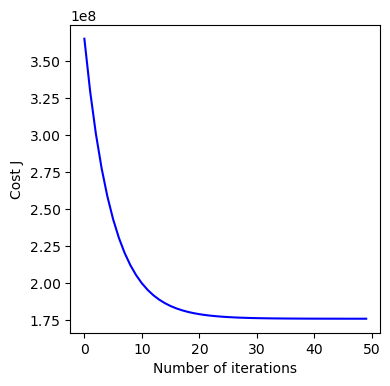

In [ ]:
plt.figure()
plt.plot(np.arange(0,num_iters), J_history, '-b');
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');

In [ ]:
# Display gradient descent's result
print('Theta computed from gradient descent: \n');
print(theta);

Theta computed from gradient descent: 

[20439.76099402  5367.70572687 -4557.15174504]


Predicted number of shares: 16884.1068561108
True number of shares: 27000


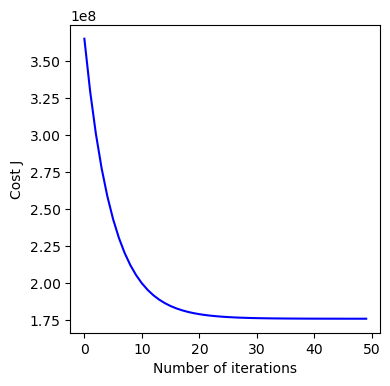

In [ ]:
x_sample = np.array([515, 7])

# Normalize
x_sample_norm = (x_sample - mu) / sigma

# Add the intercept term
x_sample_norm = np.concatenate([[1], x_sample_norm])

shares_predicted = x_sample_norm.dot(theta)
print('Predicted number of shares:', shares_predicted)
print('True number of shares: 27000')
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(num_iters), J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()
